<a href="https://colab.research.google.com/github/yosyos1998/Predictive_Maintenance/blob/main/Data_Vis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Visualization

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

# from pandas.tools.plotting import scatter_matrix


In [ ]:
# Load training data

df_tr_lbl = pd.read_csv('train.csv')
df_tr_lbl.head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,sd15,sd16,sd17,sd18,sd19,sd20,sd21,ttf,label_bnc,label_mcc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,191,0,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,0.008697,0.0,0.000000,0.0,0.0,0.042426,0.003253,190,0,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,0.007640,0.0,1.154701,0.0,0.0,0.055076,0.044573,189,0,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,0.028117,0.0,1.000000,0.0,0.0,0.076322,0.037977,188,0,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,0.025953,0.0,1.095445,0.0,0.0,0.073621,0.033498,187,0,0


In [ ]:
#exclude enging id and cycle number from the input features:

featurs = ['setting1','setting2','setting3','s1','s2','s3','s4','s5','s6','s7','s8','s9','s10','s11','s12','s13','s14','s15','s16','s17','s18','s19','s20','s21']

<Axes: title={'center': 'Features Standard Deviation'}>

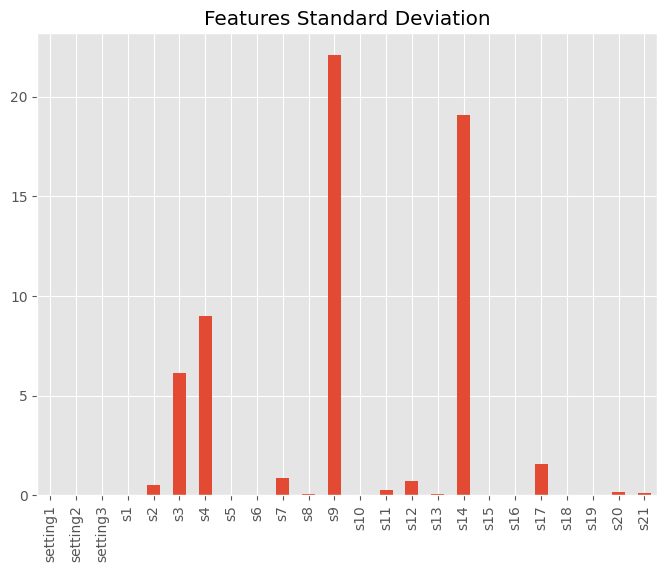

In [ ]:
#plot and compare the standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), title="Features Standard Deviation")

<Axes: title={'center': 'Features Standard Deviation (log)'}>

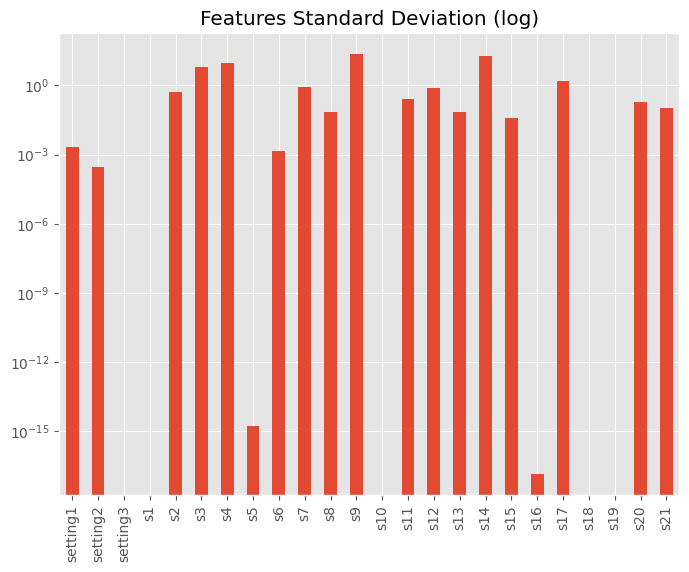

In [ ]:
# plot and compare the log standard deviation of input features:

df_tr_lbl[featurs].std().plot(kind='bar', figsize=(8,6), logy=True,title="Features Standard Deviation (log)")

In [ ]:
# get ordered list of top variance features:

featurs_top_var = df_tr_lbl[featurs].std().sort_values(ascending=False)
featurs_top_var

s9          2.208288e+01
s14         1.907618e+01
s4          9.000605e+00
s3          6.131150e+00
s17         1.548763e+00
s7          8.850923e-01
s12         7.375534e-01
s2          5.000533e-01
s11         2.670874e-01
s20         1.807464e-01
s21         1.082509e-01
s13         7.191892e-02
s8          7.098548e-02
s15         3.750504e-02
setting1    2.187313e-03
s6          1.388985e-03
setting2    2.930621e-04
s5          1.776400e-15
s16         1.387812e-17
s1          0.000000e+00
s18         0.000000e+00
s19         0.000000e+00
setting3    0.000000e+00
s10         0.000000e+00
dtype: float64

In [ ]:
# get ordered list features correlation with regression label ttf

df_tr_lbl[featurs].corrwith(df_tr_lbl.ttf).sort_values(ascending=False)

s12         6.719831e-01
s7          6.572227e-01
s21         6.356620e-01
s20         6.294285e-01
s16        -3.969701e-16
s5         -3.969701e-16
setting2   -1.947628e-03
setting1   -3.198458e-03
s6         -1.283484e-01
s14        -3.067689e-01
s9         -3.901016e-01
s13        -5.625688e-01
s8         -5.639684e-01
s3         -5.845204e-01
s17        -6.061536e-01
s2         -6.064840e-01
s15        -6.426670e-01
s4         -6.789482e-01
s11        -6.962281e-01
setting3             NaN
s1                   NaN
s10                  NaN
s18                  NaN
s19                  NaN
dtype: float64

In [ ]:
# list of features having low or no correlation with regression label ttf and very low or no variance
# These features will be target for removal in feature selection

low_cor_featrs = ['setting3', 's1', 's10', 's18','s19','s16','s5', 'setting2', 'setting1']
df_tr_lbl[low_cor_featrs].describe()

,setting3,s1,s10,s18,s19,s16,s5,setting2,setting1
count,20631.0,20631.00,20631.0,20631.0,20631.0,2.063100e+04,2.063100e+04,20631.000000,20631.000000
mean,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,0.000002,-0.000009
std,0.0,0.00,0.0,0.0,0.0,1.387812e-17,1.776400e-15,0.000293,0.002187
min,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000600,-0.008700
25%,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,-0.000200,-0.001500
50%,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,0.000000,0.000000
75%,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,0.000300,0.001500
max,100.0,518.67,1.3,2388.0,100.0,3.000000e-02,1.462000e+01,0.000600,0.008700


In [ ]:
# list of features having high correlation with regression label ttf

correl_featurs = ['s12', 's7', 's21', 's20', 's6', 's14', 's9', 's13', 's8', 's3', 's17', 's2', 's15', 's4', 's11']

df_tr_lbl[correl_featurs].describe()

,s12,s7,s21,s20,s6,s14,s9,s13,s8,s3,s17,s2,s15,s4,s11
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000,20631.000000
mean,521.413470,553.367711,23.289705,38.816271,21.609803,8143.752722,9065.242941,2388.096152,2388.096652,1590.523119,393.210654,642.680934,8.442146,1408.933782,47.541168
std,0.737553,0.885092,0.108251,0.180746,0.001389,19.076176,22.082880,0.071919,0.070985,6.131150,1.548763,0.500053,0.037505,9.000605,0.267087
min,518.690000,549.850000,22.894200,38.140000,21.600000,8099.940000,9021.730000,2387.880000,2387.900000,1571.040000,388.000000,641.210000,8.324900,1382.250000,46.850000
25%,520.960000,552.810000,23.221800,38.700000,21.610000,8133.245000,9053.100000,2388.040000,2388.050000,1586.260000,392.000000,642.325000,8.414900,1402.360000,47.350000
50%,521.480000,553.440000,23.297900,38.830000,21.610000,8140.540000,9060.660000,2388.090000,2388.090000,1590.100000,393.000000,642.640000,8.438900,1408.040000,47.510000
75%,521.950000,554.010000,23.366800,38.950000,21.610000,8148.310000,9069.420000,2388.140000,2388.140000,1594.380000,394.000000,643.000000,8.465600,1414.555000,47.700000
max,523.380000,556.060000,23.618400,39.430000,21.610000,8293.720000,9244.590000,2388.560000,2388.560000,1616.910000,400.000000,644.530000,8.584800,1441.490000,48.530000


In [ ]:
# add the regression label 'ttf' to the list of high corr features

correl_featurs_lbl = correl_featurs + ['ttf']

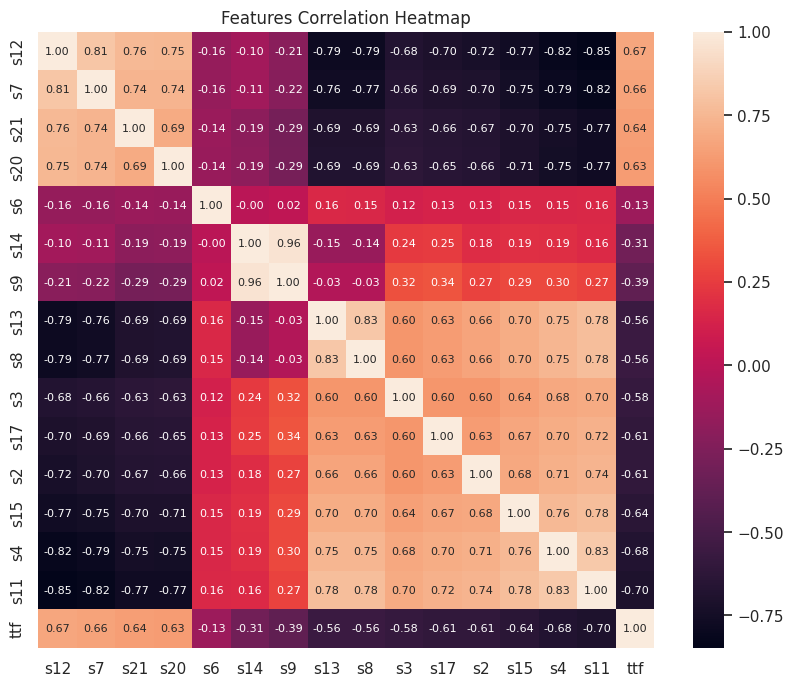

In [ ]:
# plot a heatmap to display +ve and -ve correlation among features and regression label:

import seaborn as sns
cm = np.corrcoef(df_tr_lbl[correl_featurs_lbl].values.T)
sns.set(font_scale=1.0)
fig = plt.figure(figsize=(10, 8))
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 8}, yticklabels=correl_featurs_lbl, xticklabels=correl_featurs_lbl)
plt.title('Features Correlation Heatmap')
plt.show()

In [ ]:
def explore_col(s, e):

    """Plot 4 main graphs for a single feature.

        plot1: histogram
        plot2: boxplot
        plot3: line plot (time series over cycle)
        plot4: scatter plot vs. regression label ttf

    Args:
        s (str): The column name of the feature to be plotted.
        e (int): The number of random engines to be plotted for plot 3. Range from 1 -100, 0:all engines, >100: all engines.

    Returns:
        plots

    """

    fig = plt.figure(figsize=(10, 8))


    sub1 = fig.add_subplot(221)
    sub1.set_title(s +' histogram')
    sub1.hist(df_tr_lbl[s])

    sub2 = fig.add_subplot(222)
    sub2.set_title(s +' boxplot')
    sub2.boxplot(df_tr_lbl[s])

    #np.random.seed(12345)

    if e > 100 or e <= 0:
        select_engines = list(pd.unique(df_tr_lbl.id))
    else:
        select_engines = np.random.choice(range(1,101), e, replace=False)

    sub3 = fig.add_subplot(223)
    sub3.set_title('time series: ' + s +' / cycle')
    sub3.set_xlabel('cycle')
    for i in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == i]
        sub3.plot(df['cycle'],df[s])

    sub4 = fig.add_subplot(224)
    sub4.set_title("scatter: "+ s + " / ttf (regr label)")
    sub4.set_xlabel('ttf')
    sub4.scatter(df_tr_lbl['ttf'],df_tr_lbl[s])


    plt.tight_layout()
    plt.show()

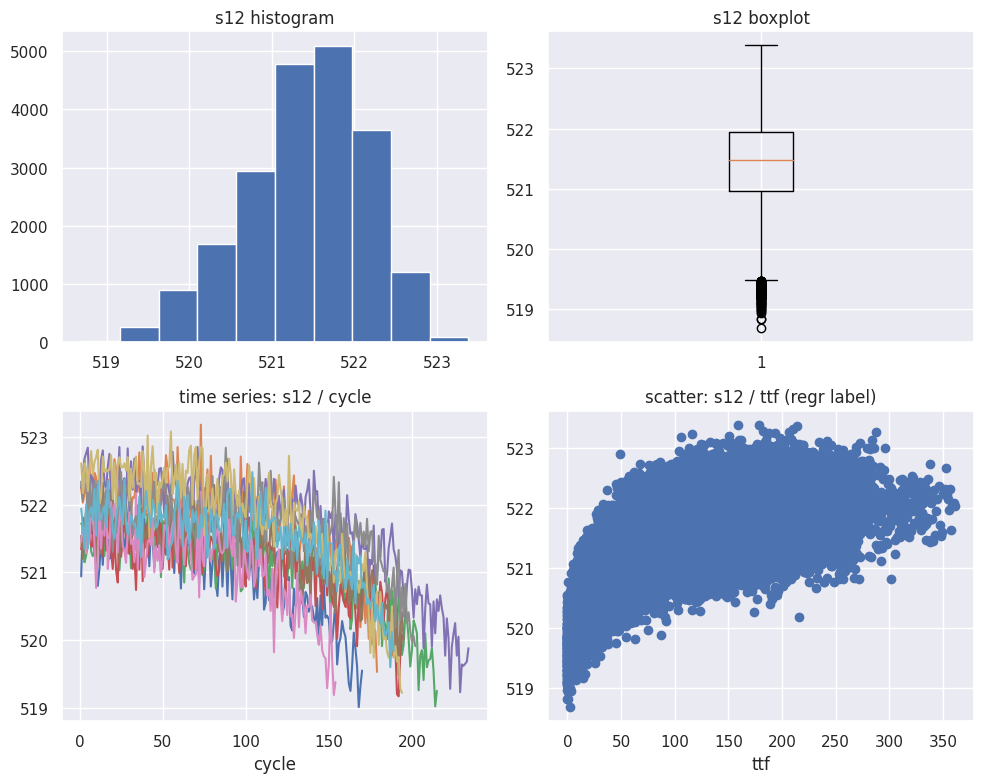

In [ ]:
explore_col("s12", 10)

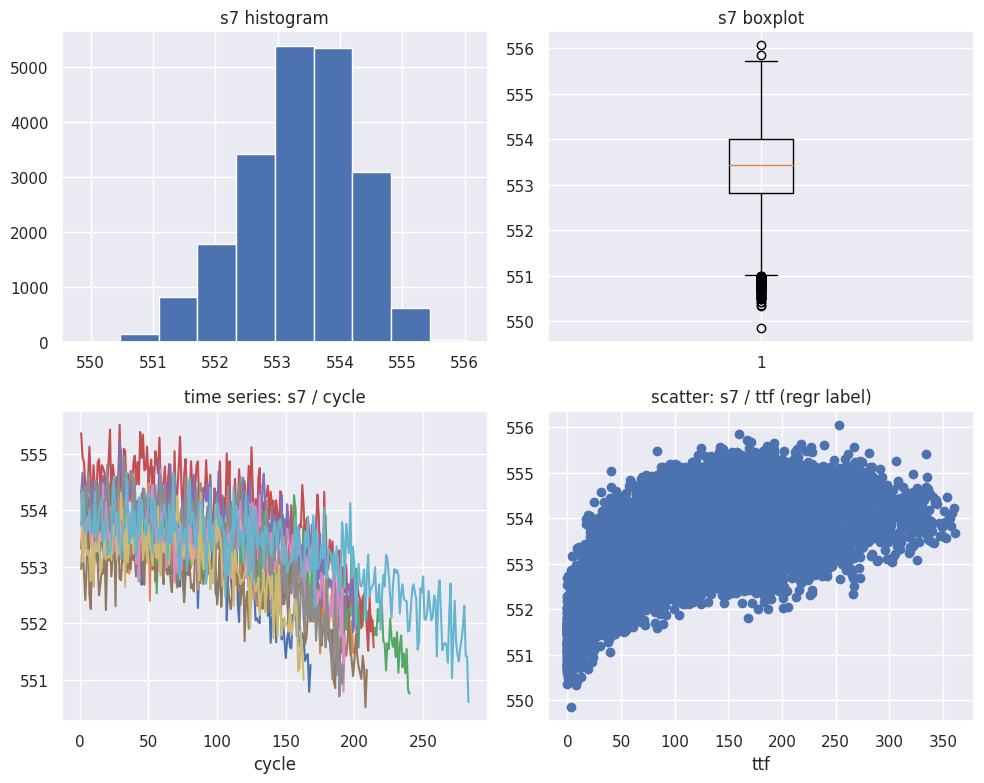

In [ ]:
explore_col("s7", 10)

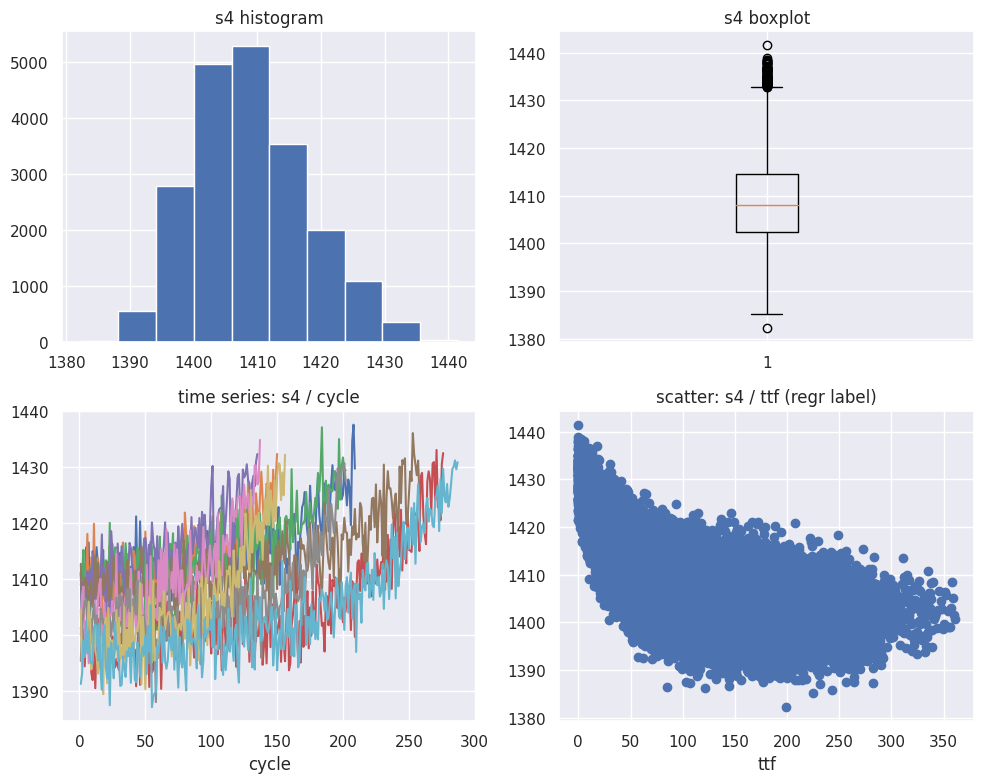

In [ ]:
explore_col("s4", 10)

In [ ]:
# Create a function to explore the time series plot each sensor selecting random sample engines

def plot_time_series(s):

    """Plot time series of a single sensor for 10 random sample engines.

        Args:
        s (str): The column name of the sensor to be plotted.

    Returns:
        plots

    """

    fig, axes = plt.subplots(10, 1, sharex=True, figsize = (15, 15))
    fig.suptitle(s + ' time series / cycle', fontsize=15)

    #np.random.seed(12345)
    select_engines = np.random.choice(range(1,101), 10, replace=False).tolist()

    for e_id in select_engines:
        df = df_tr_lbl[['cycle', s]][df_tr_lbl.id == e_id]
        i = select_engines.index(e_id)
        axes[i].plot(df['cycle'],df[s])
        axes[i].set_ylabel('engine ' + str(e_id))
        axes[i].set_xlabel('cycle')
        #axes[i].set_title('engine ' + str(e_id), loc='right')

    #plt.tight_layout()
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

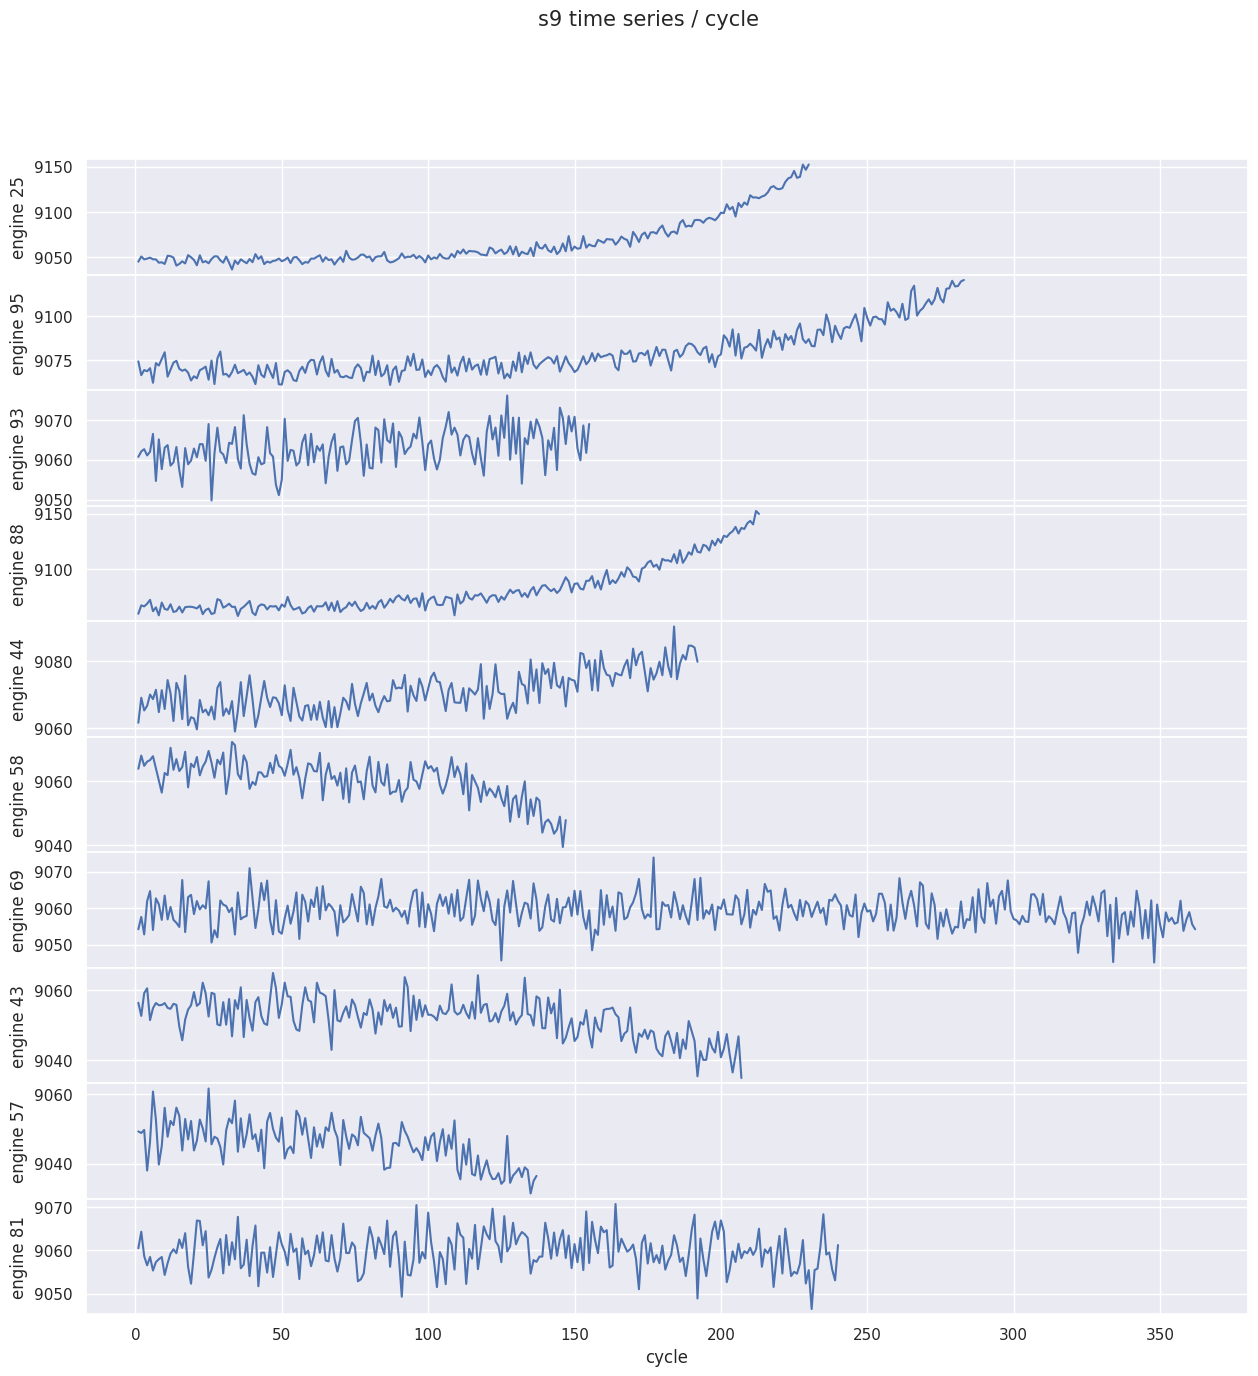

In [ ]:
plot_time_series('s9')

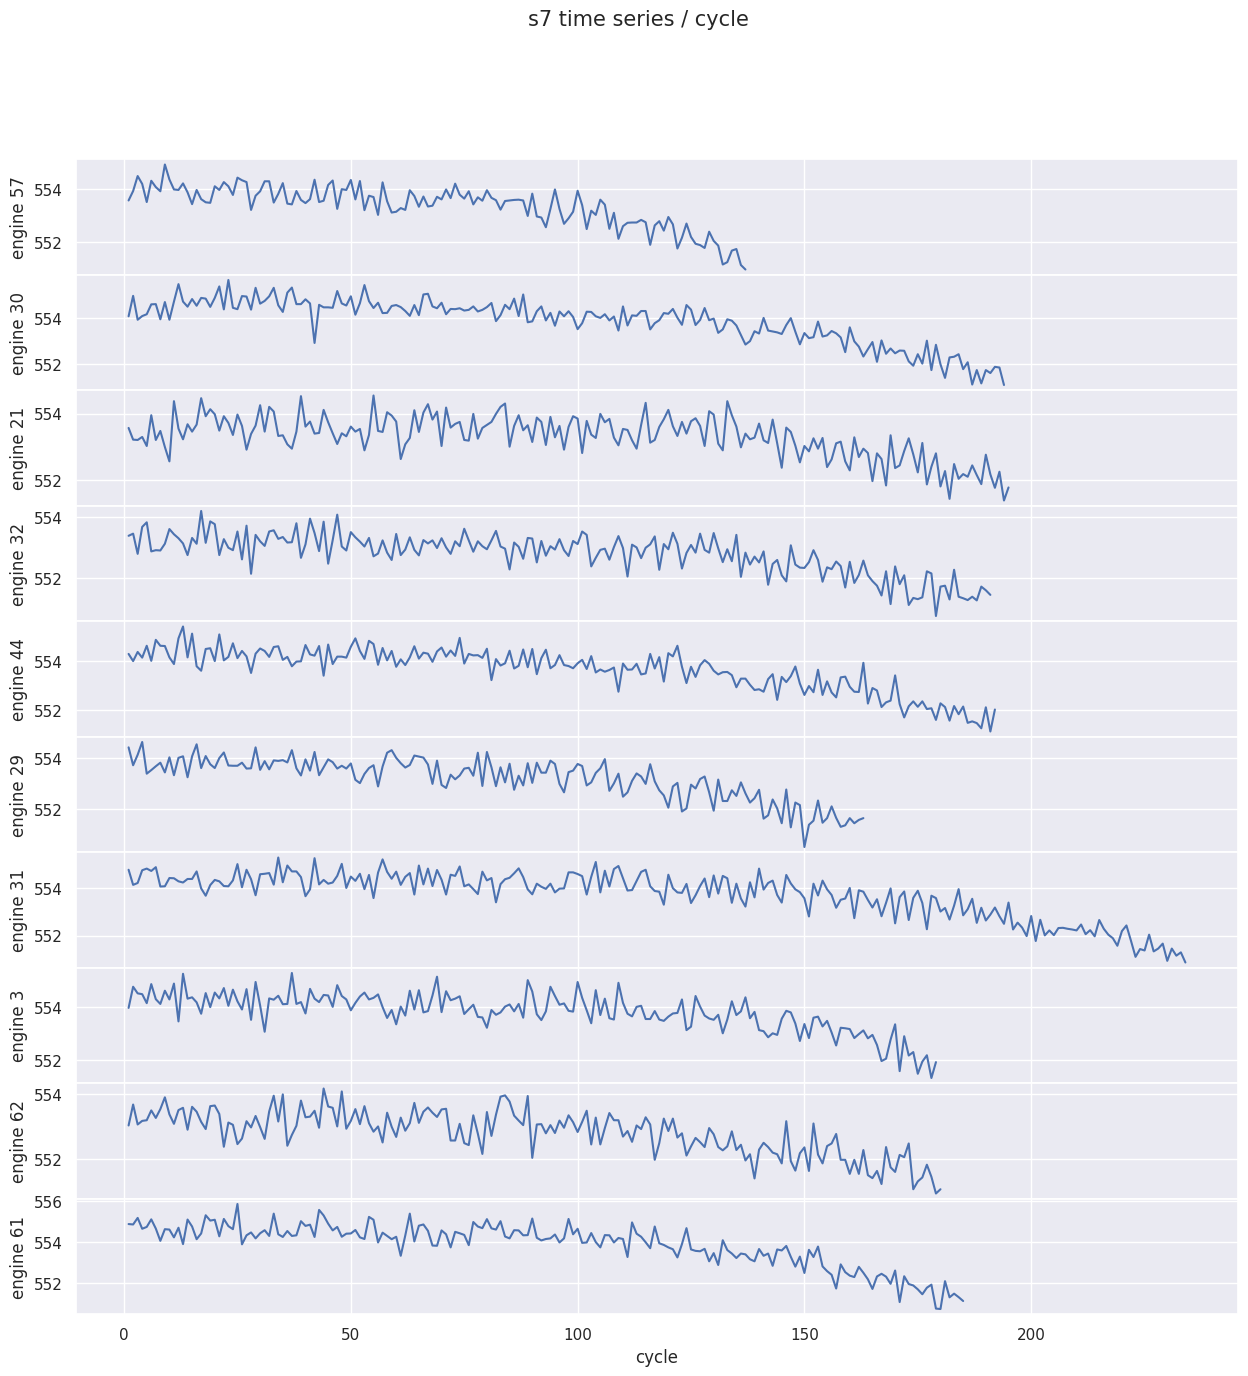

In [ ]:
plot_time_series('s7')

In [ ]:
# Classification Labels stat
print(df_tr_lbl['label_bnc'].value_counts())
print('\nNegaitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[0]/df_tr_lbl['label_bnc'].count()))
print('\nPosiitve samples =  {0:.0%}'.format(df_tr_lbl['label_bnc'].value_counts()[1]/df_tr_lbl['label_bnc'].count()))

label_bnc
0    17531
1     3100
Name: count, dtype: int64

Negaitve samples =  85%

Posiitve samples =  15%


In [ ]:
# print stat for multiclass classification label

print(df_tr_lbl['label_mcc'].value_counts())
print('\nClass 0 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[0]/df_tr_lbl['label_mcc'].count()))
print('\nClass 1 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[1]/df_tr_lbl['label_mcc'].count()))
print('\nClass 2 samples =  {0:.0%}'.format(df_tr_lbl['label_mcc'].value_counts()[2]/df_tr_lbl['label_mcc'].count()))

label_mcc
0    17531
2     1600
1     1500
Name: count, dtype: int64

Class 0 samples =  85%

Class 1 samples =  7%

Class 2 samples =  8%


## Summary
There is a very high correlation (> 0.8) between some features e.g.(s14 & s9), (s11 & s4), (s11 & s7), (s11 & s12), (s4 & s12), (s8 & s13), (s7 & s12). This multicollinearity may hurt the performance of some machine learning algorithms. So, part of these features will be target for elimination in feature selection during the modeling phase.
Most features have nonlinear relation with the TTF, hence adding their polynomial transforms may enhance models performance.
Most features exhibit normal distribution which is likely improves models performance.
AUC ROC should be used for classification models evaluation instead of Accuracy due to class’s imbalance in the training data.
